In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from urllib.request import urlretrieve

In [59]:
import skimage.io

In [81]:
import skimage.transform

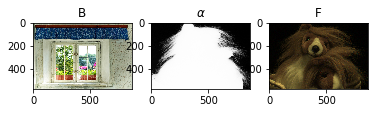

In [84]:
rgb = skimage.io.imread('http://grail.cs.washington.edu/projects/digital-matting/image-matting/summary/lion/comp-black.truth.png')
alpha = skimage.io.imread('http://grail.cs.washington.edu/projects/digital-matting/image-matting/summary/lion/alpha.truth.png')
background = skimage.io.imread('https://cdn.pixabay.com/photo/2015/09/08/16/43/window-930269_960_720.jpg')

background = skimage.transform.resize(background, rgb.shape, mode='reflect')

subplot(1,3,1)
title(r'B')
imshow(background);


subplot(1,3,2)
title(r'$\alpha$')
imshow(alpha, cmap=cm.gray);

subplot(1,3,3)
title("F")
imshow(rgb)



In [65]:
import skimage.util

In [85]:
background = skimage.img_as_float(background)
alpha = skimage.util.img_as_float(alpha)
rgb = skimage.util.img_as_float(rgb)

In [86]:
alpha = alpha[:,:,None]

In [87]:
composite = (1-alpha)*background + alpha*rgb

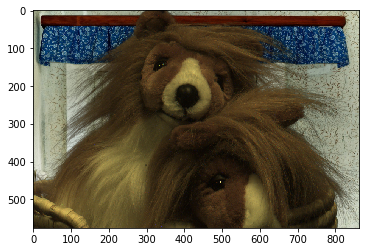

In [88]:
imshow(composite)

# Edges

In [213]:
import skimage.data

In [214]:
coffee = skimage.data.coffee()

In [95]:
gs = skimage.color.rgb2gray(coffee)

(0, 600)

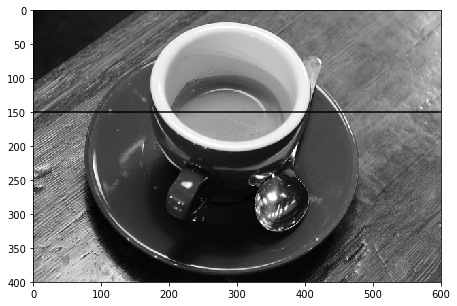

In [219]:
imshow(gs, cmap=cm.gray);
hlines(150, 0, 600)
xlim(0, 600)

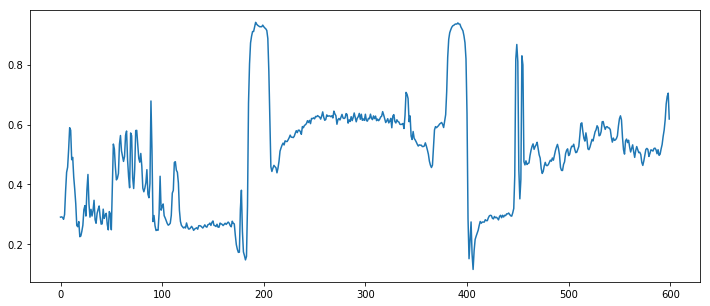

In [221]:
plot(gs[150]);

In [222]:
import scipy.ndimage

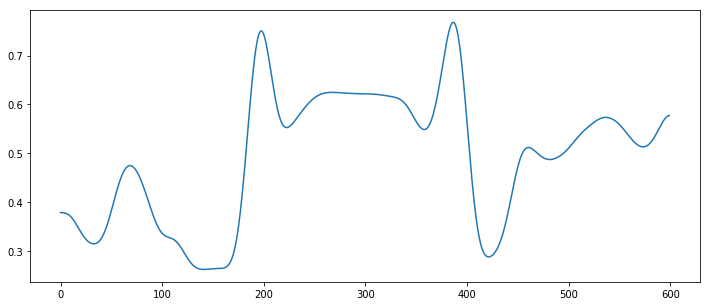

In [253]:
plot(scipy.ndimage.gaussian_filter1d(gs[150], sigma=10))

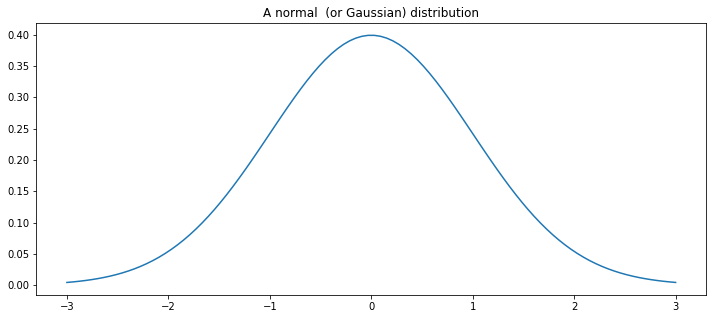

In [259]:
domain =  linspace(-3, 3, 100)
plot(domain, [scipy.stats.norm.pdf(x) for x in domain]);
title("A normal  (or Gaussian) distribution");

(-100, 100)

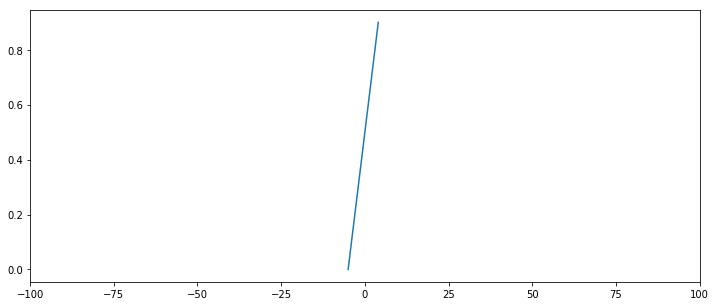

In [283]:
my_filter = arange(10)/10.
plot(arange(10)-5, my_filter)
xlim(-100, 100)

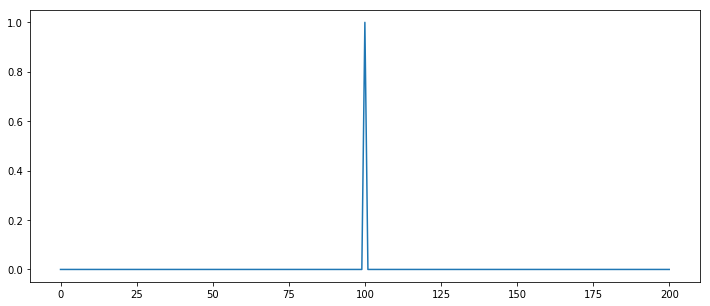

In [284]:
impulse = np.zeros(201)
impulse[len(impulse)//2] = 1
plot(impulse);

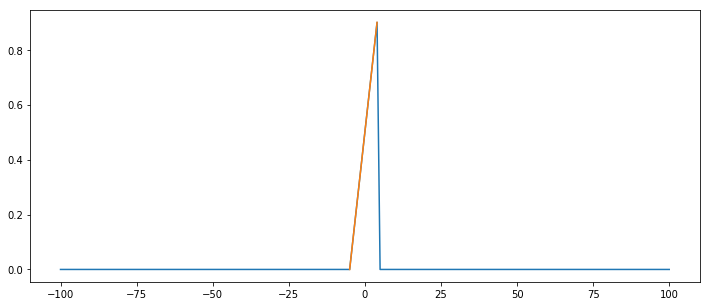

In [288]:
plot(arange(201)-100, scipy.ndimage.convolve1d(impulse, my_filter));
plot(arange(10)-5, my_filter);

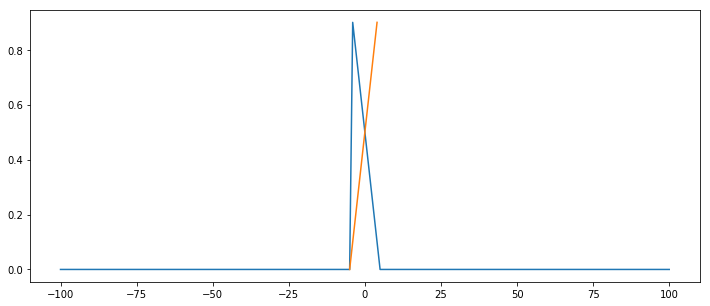

In [289]:
plot(arange(201)-100, scipy.ndimage.correlate1d(impulse, my_filter));
plot(arange(10)-5, my_filter);

In [93]:
import skimage.filters

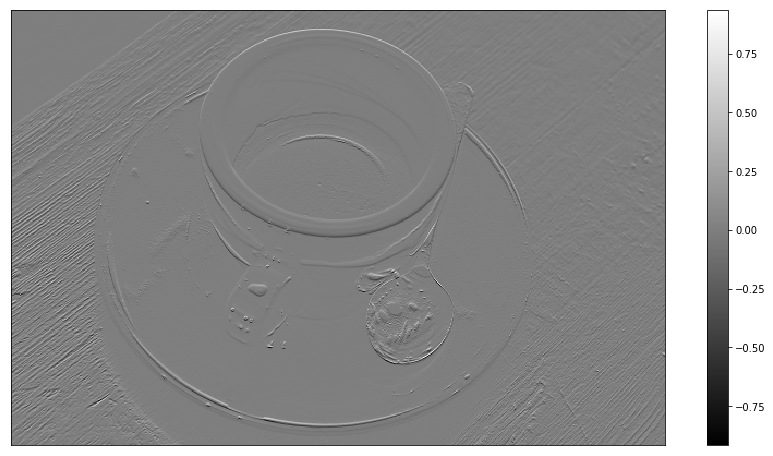

In [143]:
figsize(15,8)
imshow(np.diff(gs, axis=0), cmap=cm.gray)
colorbar()
xticks([]); yticks([]);

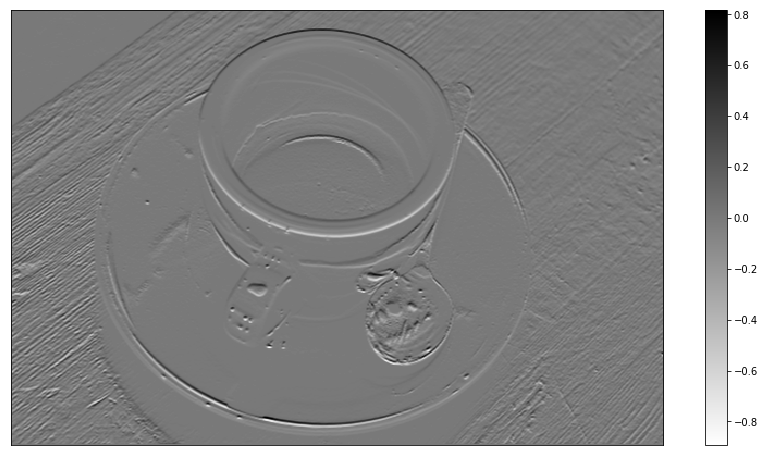

In [122]:
figsize(15,8)
imshow(skimage.filters.sobel_h(gs), cmap=cm.gray_r)
colorbar()
xticks([]); yticks([]);

In [144]:
SOBEL_H = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

In [145]:
import scipy.ndimage

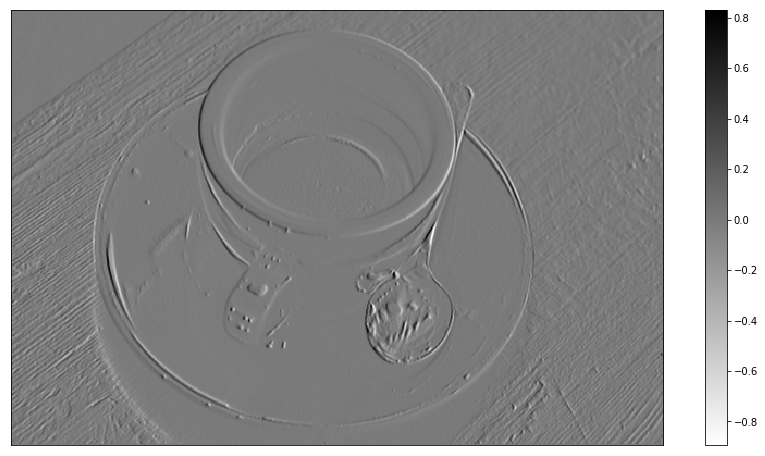

In [146]:
figsize(15,8)
imshow(skimage.filters.sobel_v(gs), cmap=cm.gray_r)
colorbar()
xticks([]); yticks([]);

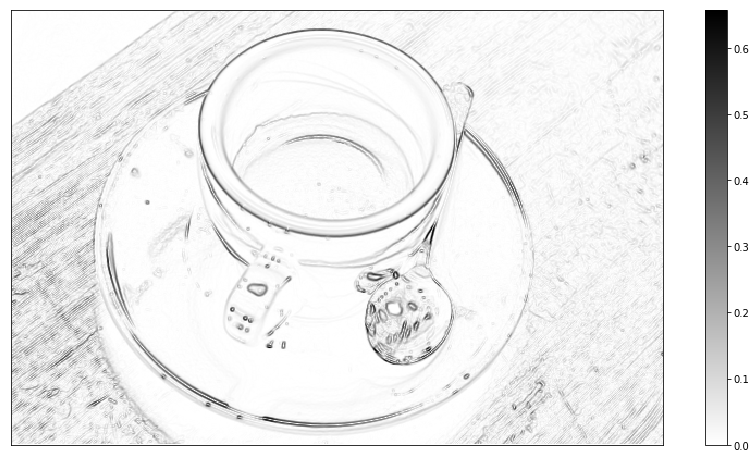

In [147]:
figsize(15,8)
imshow(skimage.filters.sobel(gs), cmap=cm.gray_r)
colorbar()
xticks([]); yticks([]);

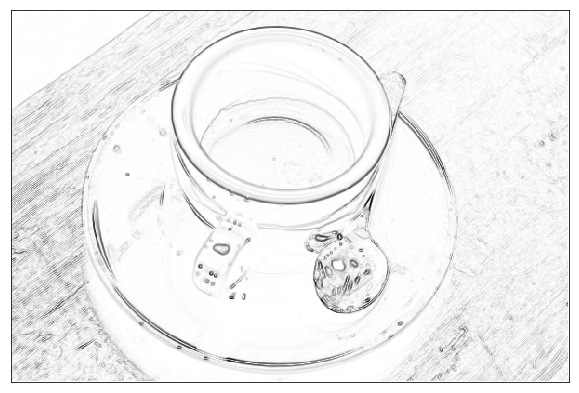

In [148]:
figsize(10,10)
imshow(np.hypot(skimage.filters.sobel_h(gs), skimage.filters.sobel_v(gs)), 
       cmap=cm.gray_r)
xticks([]); yticks([]);

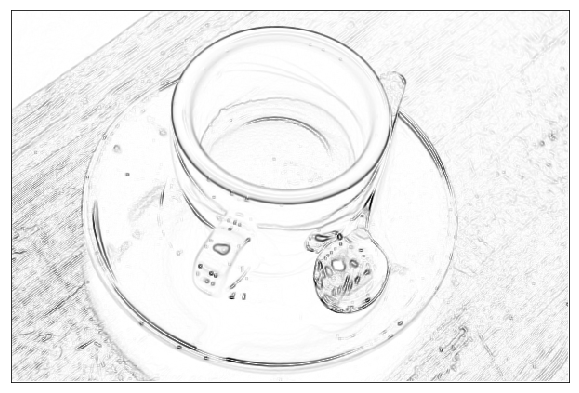

In [114]:
figsize(10,10)
imshow(skimage.filters.prewitt(gs), cmap=cm.gray_r)
xticks([]); yticks([]);

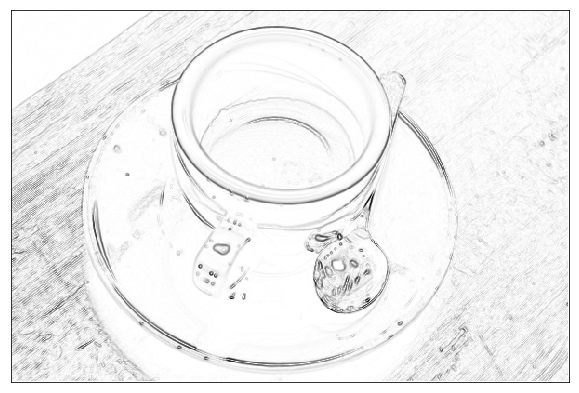

In [115]:
figsize(10,10)
imshow(skimage.filters.scharr(gs), cmap=cm.gray_r)
xticks([]); yticks([]);

In [116]:
import skimage.feature

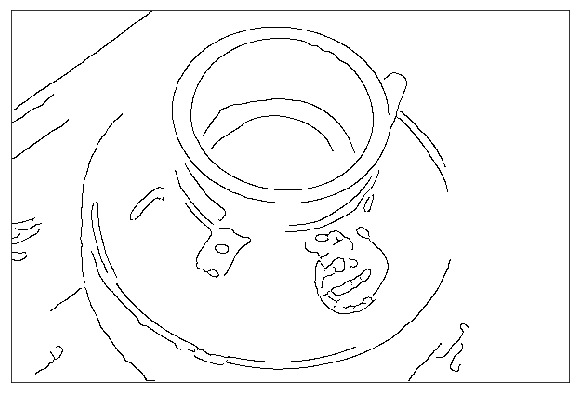

In [112]:
figsize(10,10)
imshow(skimage.feature.canny(gs, sigma=3), cmap=cm.gray_r)
xticks([]); yticks([]);

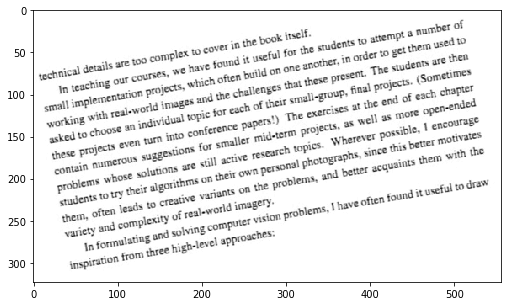

In [200]:
im = skimage.io.imread('https://docs.opencv.org/3.0-beta/_downloads/imageTextR.png')
im = skimage.img_as_float(im)
im = skimage.color.rgb2gray(im)
imshow(im, cmap=cm.gray);

(-0.5, 555.5, 322.5, -0.5)

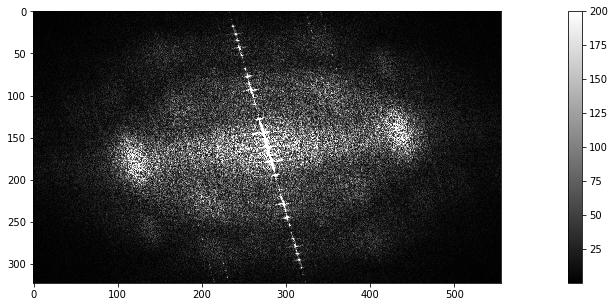

In [212]:
figsize(12,5)
freqs = np.fft.fft2(im);
freqs = np.fft.fftshift(freqs)
imshow(np.abs(freqs), vmax=200, cmap=cm.gray);
colorbar();
axis('scaled')

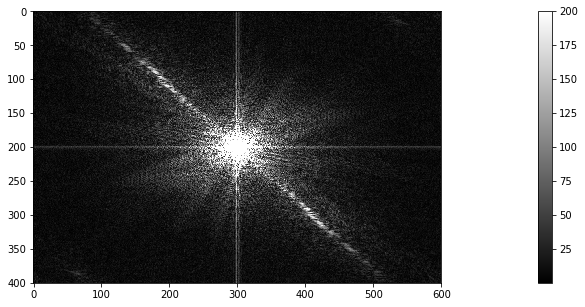

In [211]:
figsize(12,5)
freqs = np.fft.fft2(gs);
freqs = np.fft.fftshift(freqs)
imshow(np.abs(freqs), vmax=200, cmap=cm.gray);
colorbar();
axis('scaled')

normal_vmax = np.percentile(np.abs(freqs), 99)

(-0.5, 599.5, 399.5, -0.5)

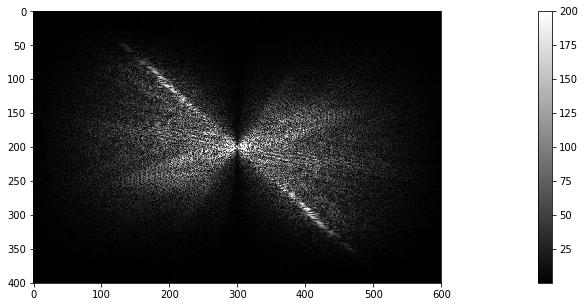

In [210]:
figsize(12,5)
freqs = np.fft.fft2(skimage.filters.sobel_v(gs));
freqs = np.fft.fftshift(freqs)
imshow(np.abs(freqs), vmax=200, cmap=cm.gray);
colorbar();
axis('scaled')